In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_set = np.array(df)
m, n = data_set.shape
np.random.shuffle(data_set) 

test_size = 200  
data_test = data_set[:test_size].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.


train = data_set[test_size:m].T
Y_train = train[0]
X_train = train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(X_train.shape)

(784, 41000)


In [37]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z - np.max(Z, axis=0, keepdims=True)) / np.sum(np.exp(Z - np.max(Z, axis=0, keepdims=True)), axis=0, keepdims=True)
    return A
    
def ReLU_deriv(Z):
     return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1 # (10, 784)W1 * (784, 41000)X + b1 = (10, 41000) + 41000 * (10, 1)b1 (broadcasting)
    A1 = ReLU(Z1) 
    Z2 = W2.dot(A1) + b2 # (10, 10)W2 * (10, 41000)Z1 + b2 = (10, 41000) + 41000 * (10, 1)b2 (broadcasting)
    A2 = ReLU(Z2) # doesnt change the shape
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)  
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3   
    return W1, b1, W2, b2, W3, b3

In [38]:
def predict(A3):
    return np.argmax(A3, 0)

def accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    accuracy_list = []
    for i in range(iterations):
        Z1, A1, Z2, A2 , Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3,  X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = predict(A3)
            print(accuracy(predictions, Y))
            acc = accuracy(predictions, Y)
            accuracy_list.append(acc)
            
    plt.plot(range(0, iterations, 10), accuracy_list)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over Iterations")
    plt.show()
    
    return W1, b1, W2, b2, W3, b3

Iteration:  0
0.1106829268292683
Iteration:  10
0.1360487804878049
Iteration:  20
0.15346341463414634
Iteration:  30
0.17209756097560974
Iteration:  40
0.21517073170731707
Iteration:  50
0.24441463414634146
Iteration:  60
0.2598048780487805
Iteration:  70
0.27895121951219515
Iteration:  80
0.30397560975609755
Iteration:  90
0.3328780487804878
Iteration:  100
0.3688048780487805
Iteration:  110
0.40202439024390246
Iteration:  120
0.4312439024390244
Iteration:  130
0.4567317073170732
Iteration:  140
0.48290243902439023
Iteration:  150
0.5071951219512195
Iteration:  160
0.532390243902439
Iteration:  170
0.5572439024390244
Iteration:  180
0.5760487804878048
Iteration:  190
0.5955121951219512
Iteration:  200
0.6132926829268293
Iteration:  210
0.6285609756097561
Iteration:  220
0.6429756097560976
Iteration:  230
0.6561707317073171
Iteration:  240
0.6681707317073171
Iteration:  250
0.6803902439024391
Iteration:  260
0.6920487804878048
Iteration:  270
0.7018780487804878
Iteration:  280
0.710585

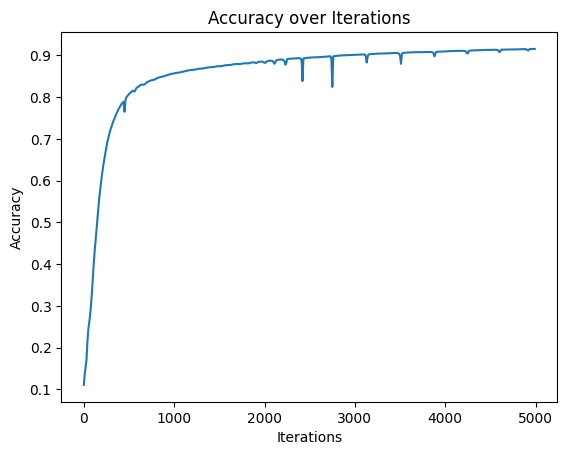

In [39]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 5000, 0.1)

In [44]:
def response(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = predict(A3)
    return predictions

def test(index, W1, b1, W2, b2, W3, b3, showPhotos=False):
    current_image = X_test[:, index, None]
    prediction = response(X_test[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_test[index]
    if showPhotos:
        print("Prediction: ", prediction)
        print("Label: ", label)
        
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
    else:
        return prediction[0] == label

Prediction:  [9]
Label:  9


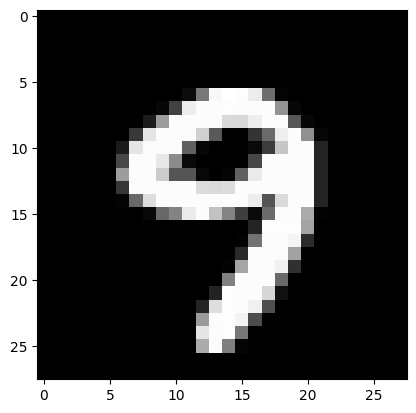

Prediction:  [5]
Label:  5


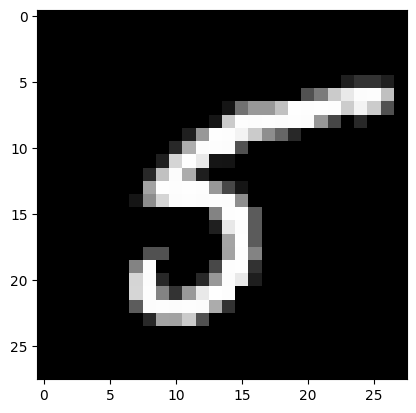

Prediction:  [0]
Label:  0


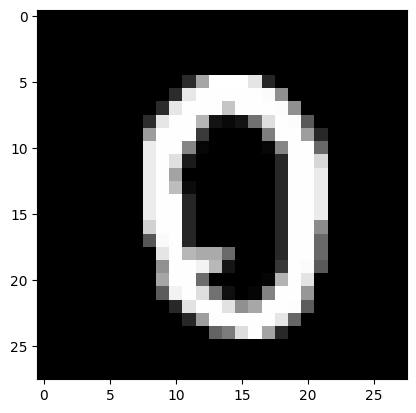

Prediction:  [3]
Label:  3


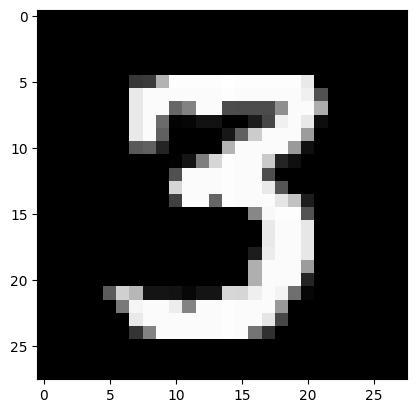

In [45]:
test(0, W1, b1, W2, b2, W3, b3, showPhotos=True)
test(31, W1, b1, W2, b2, W3, b3, showPhotos=True)
test(40, W1, b1, W2, b2, W3, b3, showPhotos=True)
test(50, W1, b1, W2, b2, W3, b3, showPhotos=True)

In [46]:
accuracy = 0
for i in range (test_size):
    if(test(i, W1, b1, W2, b2, W3, b3, showPhotos=False)):
        accuracy += 1
print(accuracy/test_size)

0.94
